In [1]:
from google.colab import files
uploaded = files.upload()


Saving apps.csv to apps.csv
Saving user_reviews.csv to user_reviews.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# Load app-level data
apps_df = pd.read_csv('apps.csv')
print("Apps Data:", apps_df.shape)
apps_df.head()

# Load user reviews
reviews_df = pd.read_csv('user_reviews.csv')
print("User Reviews:", reviews_df.shape)
reviews_df.head()


Apps Data: (9659, 14)
User Reviews: (64295, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
# Merge datasets on 'App' column
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')
print("Merged Data:", merged_df.shape)
merged_df.head()


Merged Data: (61556, 18)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [12]:
# --- INSTALLED APP CLEANING ---
apps_df = apps_df[apps_df['Installs'].notnull()]
apps_df['Installs'] = apps_df['Installs'].astype(str)
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '', regex=False)
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '', regex=False)
apps_df['Installs'] = apps_df['Installs'].astype(int)

# --- PRICE CLEANING ---
apps_df = apps_df[apps_df['Price'].notnull()]
apps_df['Price'] = apps_df['Price'].astype(str)
apps_df = apps_df[apps_df['Price'].str.startswith('$') | apps_df['Price'].str.match(r'^\d+(\.\d+)?$')]
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False)
apps_df['Price'] = apps_df['Price'].astype(float)

# --- SIZE CLEANING ---
apps_df = apps_df[apps_df['Size'].notnull()]
apps_df = apps_df[apps_df['Size'] != 'Varies with device']
apps_df['Size'] = apps_df['Size'].astype(str)
apps_df['Size'] = apps_df['Size'].str.replace('M', '').str.replace('k', '')
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')
apps_df = apps_df.dropna(subset=['Size'])

# --- RATING CLEANING ---
apps_df = apps_df[apps_df['Rating'].notnull()]
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')
apps_df = apps_df.dropna(subset=['Rating'])


In [13]:
print("Shape after cleaning:", apps_df.shape)
print(apps_df.dtypes)


Shape after cleaning: (7021, 14)
Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


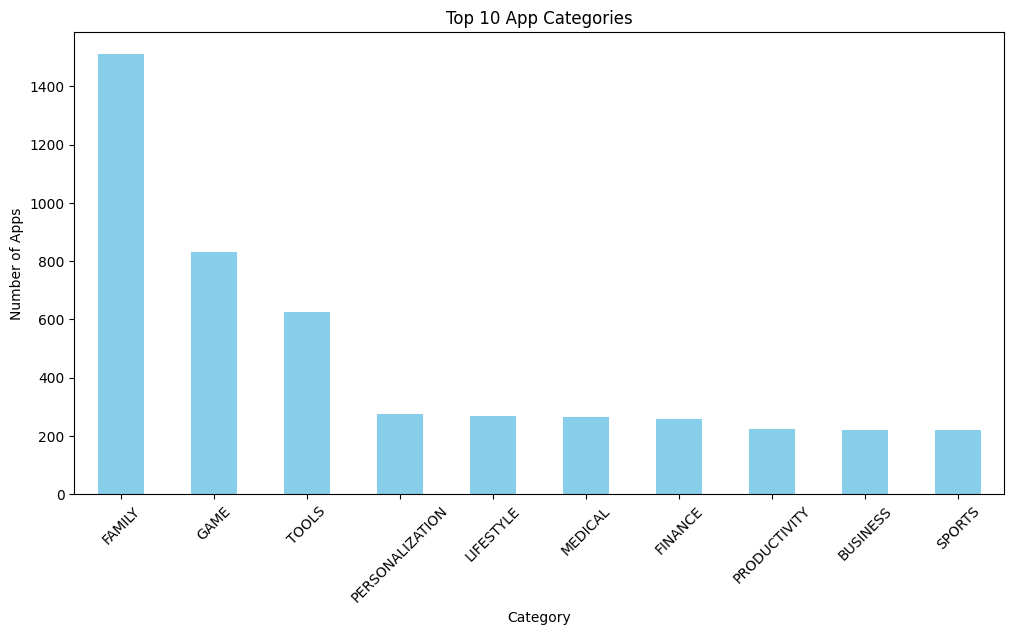

In [14]:
plt.figure(figsize=(12,6))
apps_df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 App Categories")
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


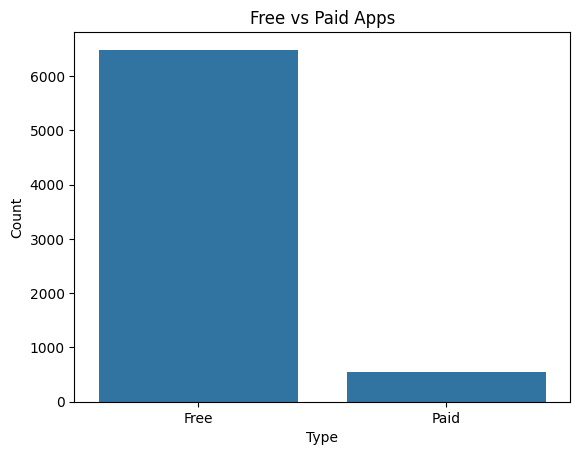

In [15]:
sns.countplot(x='Type', data=apps_df)
plt.title("Free vs Paid Apps")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


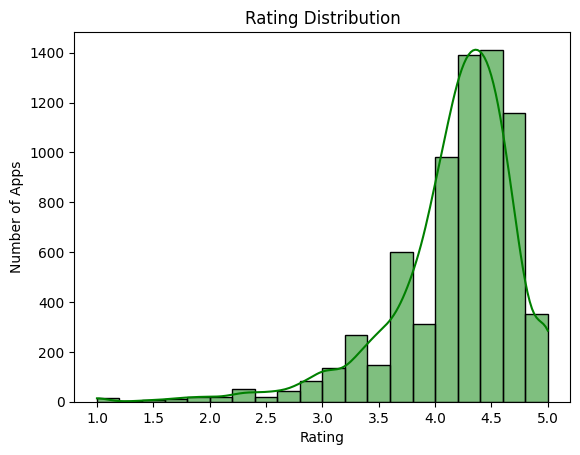

In [16]:
sns.histplot(apps_df['Rating'], bins=20, kde=True, color='green')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()


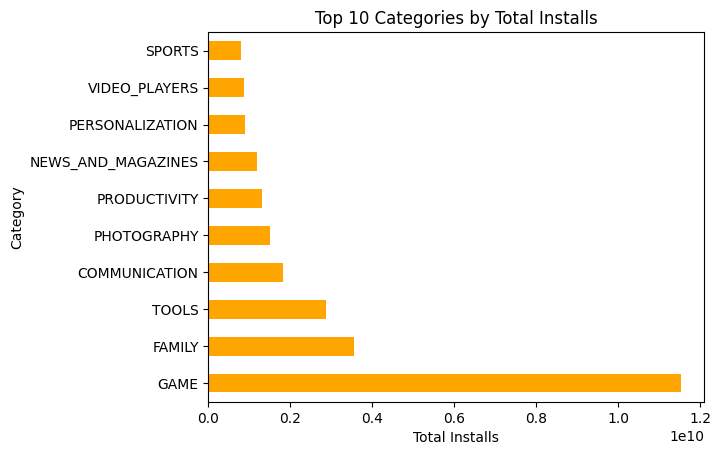

In [17]:
top_installs = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_installs.plot(kind='barh', color='orange')
plt.title("Top 10 Categories by Total Installs")
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()


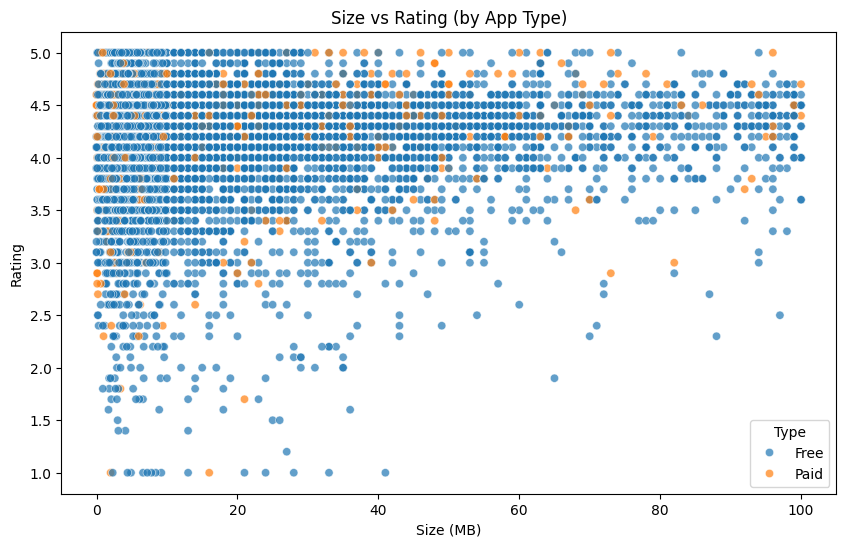

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size', y='Rating', hue='Type', data=apps_df, alpha=0.7)
plt.title("Size vs Rating (by App Type)")
plt.xlabel("Size (MB)")
plt.ylabel("Rating")
plt.show()


In [19]:
reviews_df = pd.read_csv('user_reviews.csv')
reviews_df.dropna(subset=['Sentiment'], inplace=True)
reviews_df.drop_duplicates(inplace=True)


In [20]:
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')
print("Merged Shape:", merged_df.shape)


Merged Shape: (19320, 18)


/tmp/ipython-input-21-87265442.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=merged_df, palette='pastel')


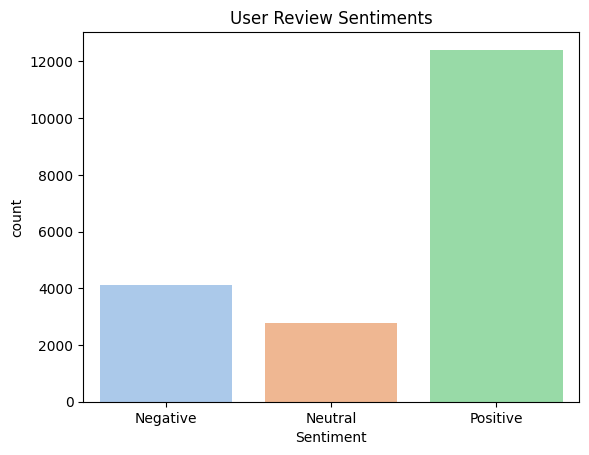

In [21]:
sns.countplot(x='Sentiment', data=merged_df, palette='pastel')
plt.title("User Review Sentiments")
plt.show()
